# Blind Tastings

#### Imports


In [1]:
#Importing libraries and modules used

import pandas as pd
import ds_fun as ds

import acquire as a
import prepare as p
import explore as e
import modeling as m

* **Data Dictionary** 

| Feature |	Definition |
|:--------|:-----------|
|quality| Target column. A wine rating from an unknown source which ranges from 3 to 9 in the dataset.|
|alcohol| The ratio of ethonal to water in the wine. Unit is alcohol by volume or 'ABV'.|
|density| Measured in grams/milliliter. Used to help determine alcohol content.|
|pH| A measure of how acidic/basic the liquid is. The range is 0 to 14. 7 is neutral. Less than 7 is acidic and greater than 7 indicates a base.|
|fixed acidity| Acids left after a steam distillation test. Measured in g/L.|
|volatile acidity| Acids which can be removed by steam distillation. Measured in g/L.|
|citric acid| Most commonly used as an acid supplement during the fermentation process to help winemakers boost the acidity|
|residual sugar| Natural grape sugars left in a wine after the alcoholic fermentation finishes. Usually measured in grams per litre (g/L).|
|chlorides| The amount of salt in the wine.|
|total sulfur dioxide| The portion of SO2 that is free in the wine plus the portion that is bound to other chemicals.|
|free sulfur dioxide| SO2 that is present in wine but has not yet reacted with other chemicals.|
|sulphates| A combination of sulfur dioxide molecules and sulfite ions|
|type| Indicates if the wine is classified as a red or white. |


#### Acquire

Two csv files were downloaded from https://data.world/food/wine-quality, one for red wine and another for white wine, then joined them together into a single dataframe totaling 6497 rows and 13 columns.  The data is from 2009.  Each row represents a distinct bottle and each column is a feature of that bottle.

In [2]:
#Importing data from local drive using function from acquire module
df = a.pour_wine()

- - -
#### Prepare
Alcohol, density, chlorides, and volatile acidity
The data was clean prior to acquisition with no null values, outliers were left in for initial exloration and modeling.  Split into three dataframes for train, validate and test


In [3]:
# performing train, val, test, split
train, val, test = p.train_validate(df)

- - -
#### Explore

Do either of these qualities have a relationship with quality scores? 

Performed stats tests on various features to check for correlation with quality.  Alcohol, density, chlorides, and volatile acidity have the strongest correlations in the chart below with their greater distance from the zero(red) line

concerns we don't know scale of quality score

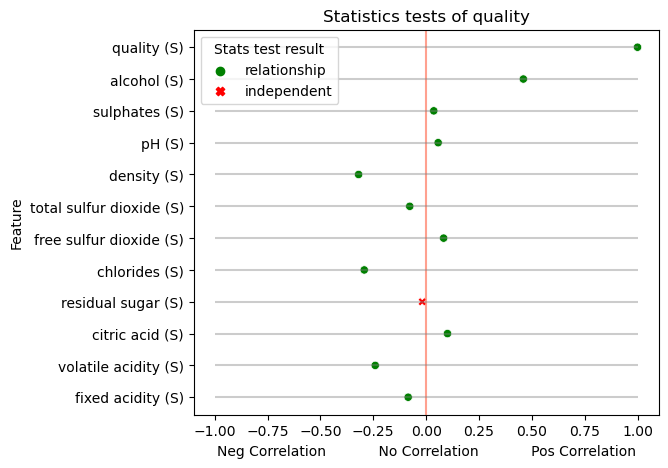

In [4]:
#function for performing pearsonr or spearman test where appropriate and plots results

e.correlation_test(train, 'quality')

Based on these results we can reject the null hypotheses and accept the alternative that there is a correlation.  We chose the 4 strongest and dropped the others.

In [5]:
#scaling continuos variables to prepare for clustering

cont_columns = ['alcohol' ,'sulphates' , 'pH' , 'density', 'total sulfur dioxide' , 'free sulfur dioxide' , 'chlorides' , 'residual sugar' , 'citric acid' , 'volatile acidity' , 'fixed acidity']
train_scaled, val_scaled, test_scaled = m.scale_cont_columns(train, val, test, cont_columns, scaler_model = 1)

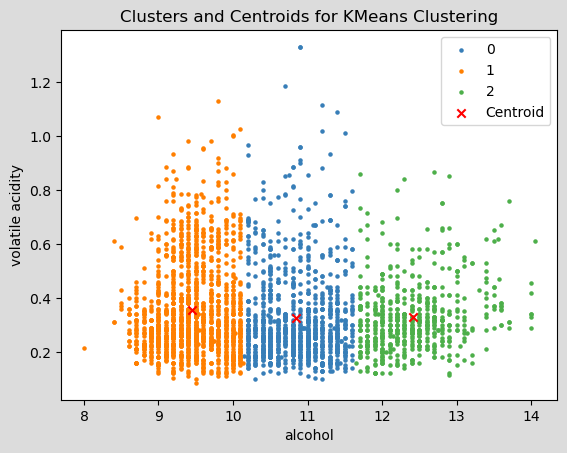

In [6]:
#calling function from explore module

e.display_clusters(train, ['alcohol' , 'volatile acidity'])

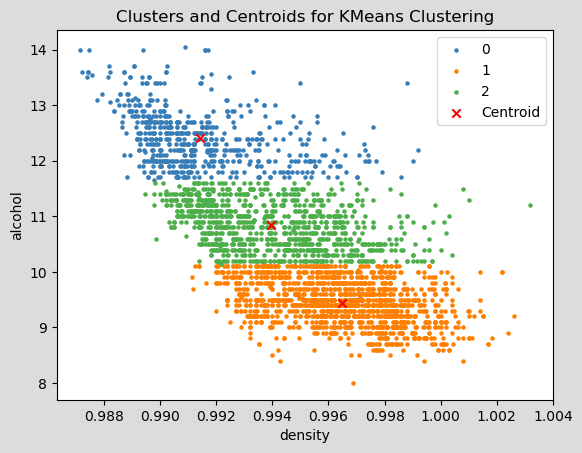

In [7]:
#calling function from explore module

e.display_clusters(train, ['density' , 'alcohol'])

- - -
#### Exploration Summary

Four features were found to be the strongest drivers of quality: alcohol, density, chlorides, and volatile acidity.  These features were used for modeling.

- - -
#### Modeling


Models with clusters did not perform as well as models withouth them so all clusters were excluded from final model.

In [8]:
#function to get dummies for the type feature

dumb_cols = ['type']
train, val, test = m.make_dummies(train, val, test, dumb_cols)

In [9]:
#isolating the target variable ('quality')
X_train, y_train, X_val, y_val, X_test, y_test = m.train_val_test(train, val, test, 'quality')

In [10]:
baseline = m.find_regression_baseline(y_train)

Using RMSE Mean training baseline: 0.8640





(Introduction
Explain how you will be evaluating your models
Include the evaluation metric you will be using and why you have chosen it
Create a baseline and briefly explain how it was calculated
If you use code to generate your baseline run the code and generate the output here
Printout should read:
Baseline: "number" "evaluation metric")


        Model  RMSE on Train  RMSE on Validate  Difference
0  OLS Linear         0.7443            0.7853       -0.04
1  Lasso Lars         0.8640            0.8876       -0.02
2     Tweedie         0.7532            0.7801       -0.03
3  Polynomial         0.7130            0.7511       -0.04


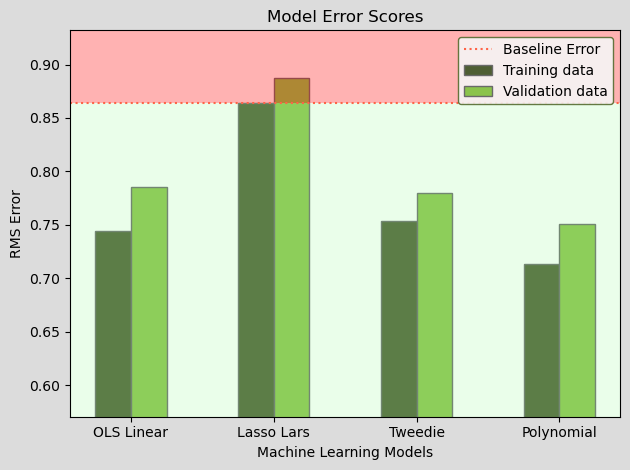

In [11]:
m.find_model_scores(X_train, y_train, X_val, y_val, baseline)

- - -
#### Test Model


The best performing model was Polynomial Regression based on it having the lowest Root Mean Squared Error, so now we will run the test set through this model.

                         Model  RMSE on Train  RMSE on Validate  RMSE on Test
0  Polynomial Regression Model          0.713            0.7511        0.7554


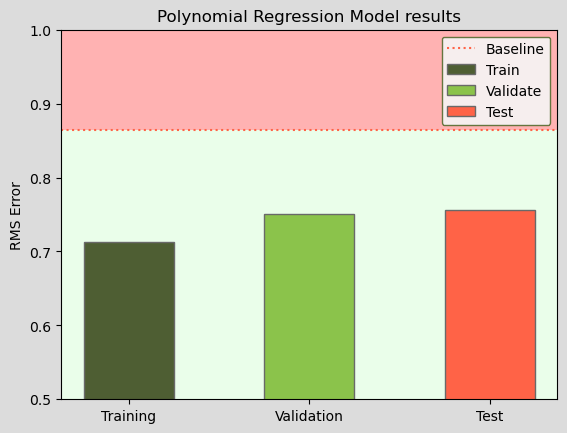

<Figure size 400x400 with 0 Axes>

In [14]:
m.final_test(X_train, y_train, X_val, y_val, X_test, y_test, baseline)

- - -
#### Modeling Wrap




(
Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production
Conclusion
)

- - -
#### Summary




(
Summarize your findings and answer the questions you brought up in explore
Summarize how drivers discovered lead or did not lead to a successful model
)

- - -
#### Recommendations





(
Recommendations are actions the stakeholder should take based on your insights
)

- - -
#### Next Steps

(see notes app)


(chemicals contributing)



(
Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.



**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**)